In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Предобработка

In [2]:
data = pd.read_csv('adult.csv')
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [5]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [10]:
numeric_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

In [11]:
X = data.drop('income', axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTreeClassifier

In [50]:

preprocessorDT = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

pipelineDT = Pipeline(steps=[('preprocessor', preprocessorDT),
                           ('classifier', DecisionTreeClassifier(random_state=42))])
pipelineDT.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['age', 'fnlwgt',
                                                   'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native-country'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

# RandomForestClassifier

In [13]:

preprocessorRF = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

pipelineRF = Pipeline(steps=[('preprocessor', preprocessorRF),
                           ('classifier', RandomForestClassifier(random_state=42))])
pipelineRF.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['age', 'fnlwgt',
                                                   'educational-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender',
                                                   'native-country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

# Результаты на тестовой выборке

In [14]:
accuracy = pipelineDT.score(X_test, y_test)
print("Accuracy DT:", accuracy)

Accuracy DT: 0.8188146176681339


In [15]:
accuracy = pipelineRF.score(X_test, y_test)
print("Accuracy RF:", accuracy)

Accuracy RF: 0.8603746545193981


# Cross validation

In [16]:
cv_scores = cross_val_score(pipelineDT, X_test, y_test, cv=5)

print("Cross-Validation Accuracy DT: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))

cv_scores = cross_val_score(pipelineRF, X_test, y_test, cv=5)

print("Cross-Validation Accuracy RF: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))


Cross-Validation Accuracy DT: 0.82 (+/- 0.01)
Cross-Validation Accuracy RF: 0.86 (+/- 0.03)


# Значимость признаков

In [53]:
preprocessor = pipelineDT.named_steps['preprocessor']

transformed_feature_names = preprocessor.get_feature_names_out(input_features=X_train.columns)

classifier = pipelineDT.named_steps['classifier']

feature_importances = classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

feature_importance_df[feature_importance_df['Importance']>0.001]


,Feature,Importance
33,cat__marital-status_Married-civ-spouse,0.198372
1,num__fnlwgt,0.194258
0,num__age,0.117931
2,num__educational-num,0.112867
3,num__capital-gain,0.104090
5,num__hours-per-week,0.064429
4,num__capital-loss,0.039579
10,cat__workclass_Private,0.009457
42,cat__occupation_Exec-managerial,0.009087
12,cat__workclass_Self-emp-not-inc,0.008679


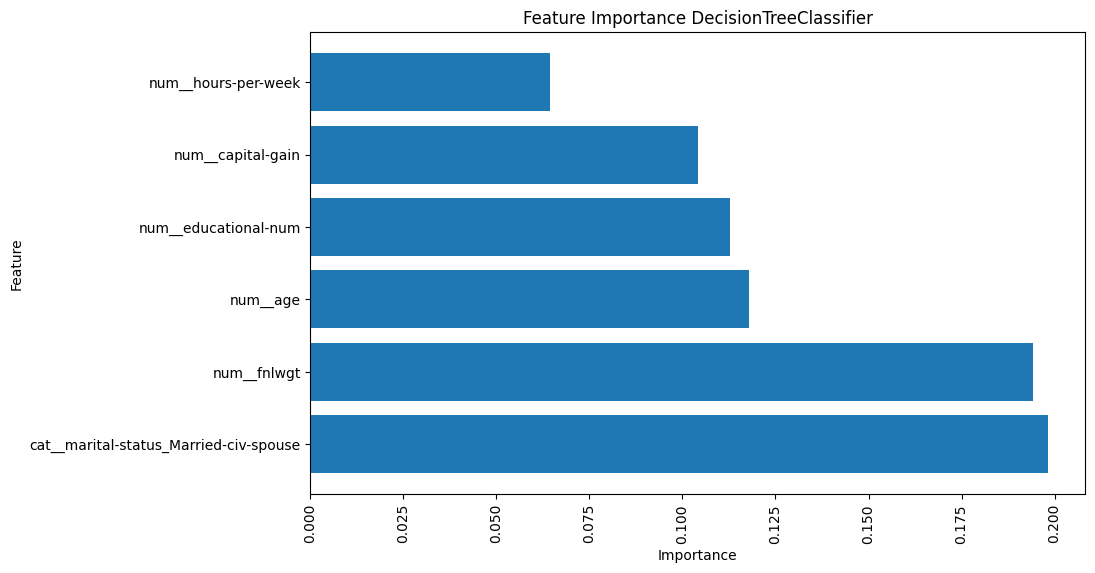

In [18]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df[feature_importance_df['Importance']>0.05]['Feature'], 
feature_importance_df[feature_importance_df['Importance']>0.05]['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance DecisionTreeClassifier')
plt.xticks(rotation=90)
plt.show()

In [19]:
preprocessor = pipelineRF.named_steps['preprocessor']

transformed_feature_names = preprocessor.get_feature_names_out(input_features=X_train.columns)

classifier = pipelineRF.named_steps['classifier']

feature_importances = classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print(feature_importance_df)


                                           Feature    Importance
1                                      num__fnlwgt  1.700502e-01
0                                         num__age  1.530366e-01
3                                num__capital-gain  8.961015e-02
5                              num__hours-per-week  8.340830e-02
33          cat__marital-status_Married-civ-spouse  6.593822e-02
..                                             ...           ...
94  cat__native-country_Outlying-US(Guam-USVI-etc)  5.015406e-05
28                        cat__education_Preschool  4.652925e-05
82                    cat__native-country_Honduras  2.196410e-05
9                      cat__workclass_Never-worked  2.451828e-06
81          cat__native-country_Holand-Netherlands  2.333244e-08

[108 rows x 2 columns]


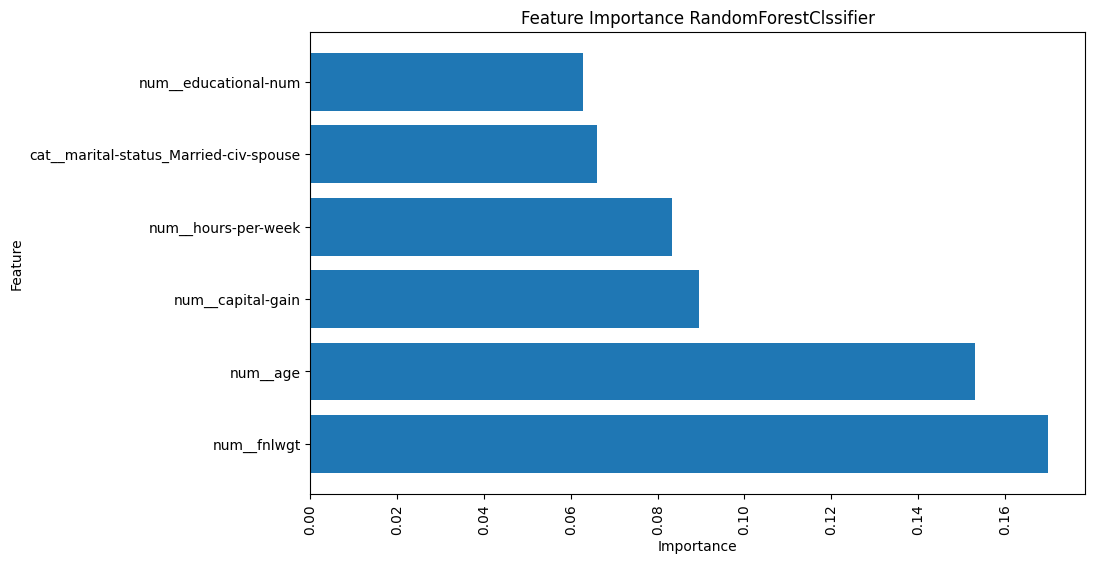

In [20]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df[feature_importance_df['Importance']>0.05]['Feature'], feature_importance_df[feature_importance_df['Importance']>0.05]['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance RandomForestClssifier')
plt.xticks(rotation=90)
plt.show()

# GridSearchCV для DecisionTreeClassifier

In [21]:
pipelineDT = Pipeline(steps=[('preprocessor', preprocessorDT),
                           ('classifier', DecisionTreeClassifier(random_state=42))])

In [22]:
param_grid = {
    'preprocessor__num__strategy': ['mean','median'],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [5, 10,15],
    'classifier__min_samples_split': [2,3, 5,7]
}


In [23]:
grid_searchDT = GridSearchCV(pipelineDT, param_grid=param_grid, cv=5)
grid_searchDT.fit(X_train, y_train)

print("Best parameters: ", grid_searchDT.best_params_)
print("Best score: ", grid_searchDT.best_score_)


Best parameters:  {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'preprocessor__num__strategy': 'mean'}
Best score:  0.8570111326341273


# GridSearchCV для RandomForestClassifier

In [33]:
preprocessorRF = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [34]:
pipelineRF = Pipeline(steps=[('preprocessor', preprocessorRF),
                           ('classifier', RandomForestClassifier(random_state=42))])

In [35]:
param_grid = {
    'classifier__n_estimators': [10, 25, 50],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5]
}

In [36]:
grid_searchRF = GridSearchCV(pipelineRF, param_grid=param_grid, cv=5)
grid_searchRF.fit(X_train, y_train )

print("Best parameters: ", grid_searchRF.best_params_)
print("Best score: ", grid_searchRF.best_score_)


Best parameters:  {'classifier__max_depth': 15, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 25}
Best score:  0.8607733384032237


# Результаты на тестововй выборке

In [37]:
best_modelDT = grid_searchDT.best_estimator_
accuracy = best_modelDT.score(X_test, y_test)
print("Accuracy DT on test set:", accuracy)

best_modelRF = grid_searchRF.best_estimator_
accuracy = best_modelRF.score(X_test, y_test)
print("Accuracy DT on test set:", accuracy)

Accuracy DT on test set: 0.8647763332992118
Accuracy DT on test set: 0.8681543658511618


# Cross Validation

In [38]:
cv_scores = cross_val_score(best_modelDT, X_test, y_test, cv=5)

print("Cross-Validation Accuracy DT: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))

cv_scores = cross_val_score(best_modelRF, X_test, y_test, cv=5)

print("Cross-Validation Accuracy RF: {:.2f} (+/- {:.2f})".format(cv_scores.mean(), cv_scores.std() * 2))


Cross-Validation Accuracy DT: 0.84 (+/- 0.03)
Cross-Validation Accuracy RF: 0.86 (+/- 0.02)


# Значимые признаки

In [39]:
best_modelDT = grid_searchDT.best_estimator_

preprocessor = best_modelDT.named_steps['preprocessor']

transformed_feature_names = preprocessor.get_feature_names_out(input_features=data.drop('income', axis=1).columns)

classifier = best_modelDT.named_steps['classifier']

feature_importances = classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

feature_importance_df[feature_importance_df['Importance']>0.001]


,Feature,Importance
33,cat__marital-status_Married-civ-spouse,0.390640
3,num__capital-gain,0.207053
2,num__educational-num,0.163926
0,num__age,0.071181
4,num__capital-loss,0.066253
5,num__hours-per-week,0.036586
42,cat__occupation_Exec-managerial,0.010684
1,num__fnlwgt,0.009487
26,cat__education_HS-grad,0.005645
12,cat__workclass_Self-emp-not-inc,0.004269


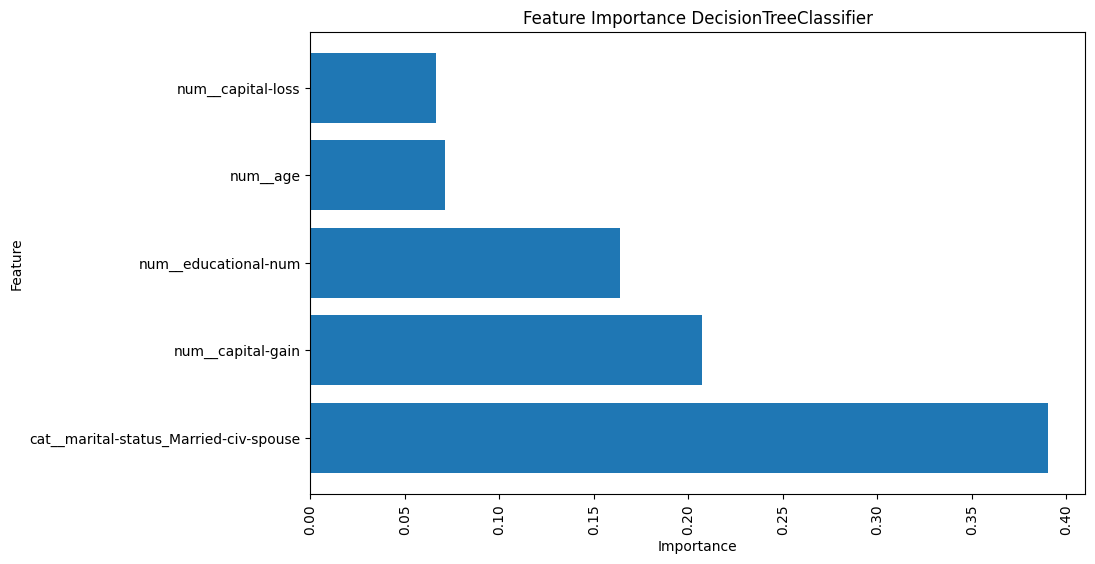

In [40]:
plt.figure(figsize=(10, 6))

plt.barh(feature_importance_df[feature_importance_df['Importance']>0.05]['Feature'], feature_importance_df[feature_importance_df['Importance']>0.05]['Importance'])

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance DecisionTreeClassifier')

plt.xticks(rotation=90)

plt.show()


In [41]:
best_modelRF = grid_searchRF.best_estimator_

preprocessor = best_modelRF.named_steps['preprocessor']

transformed_feature_names = preprocessor.get_feature_names_out(input_features=data.drop('income', axis=1).columns)

classifier = best_modelRF.named_steps['classifier']

feature_importances = classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': transformed_feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

feature_importance_df[feature_importance_df['Importance']>0.001]


,Feature,Importance
33,cat__marital-status_Married-civ-spouse,0.147627
3,num__capital-gain,0.139288
2,num__educational-num,0.104666
0,num__age,0.070727
53,cat__relationship_Husband,0.055117
5,num__hours-per-week,0.053114
4,num__capital-loss,0.040746
42,cat__occupation_Exec-managerial,0.033598
35,cat__marital-status_Never-married,0.032037
56,cat__relationship_Own-child,0.025554


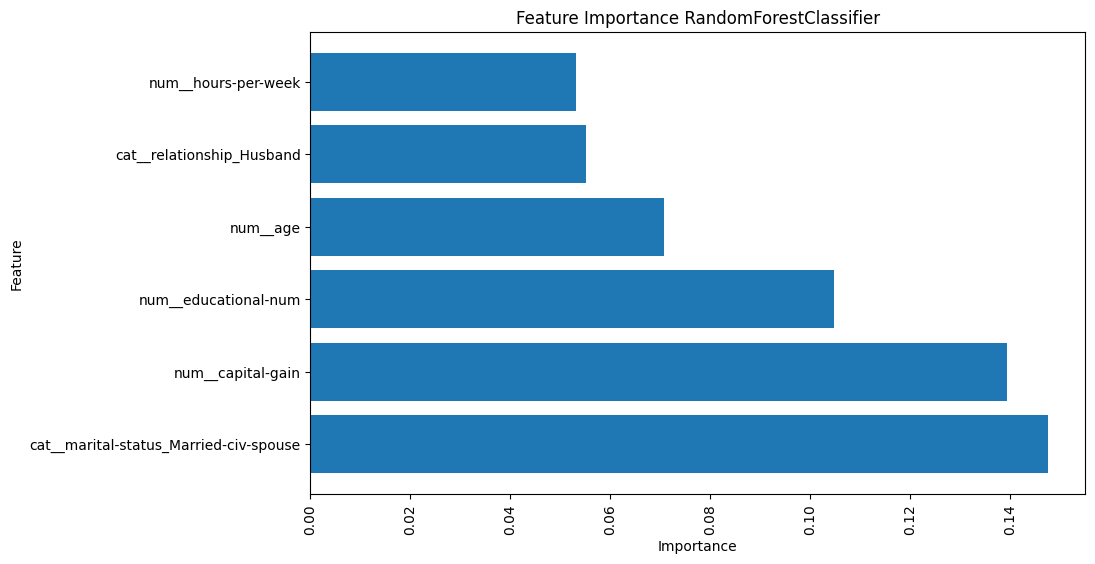

In [42]:
plt.figure(figsize=(10, 6))

plt.barh(feature_importance_df[feature_importance_df['Importance']>0.05]['Feature'], feature_importance_df[feature_importance_df['Importance']>0.05]['Importance'])

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance RandomForestClassifier')

plt.xticks(rotation=90)

plt.show()


# Метрики

In [43]:
y_predDT = grid_searchDT.predict(X_test)

accuracyDT = accuracy_score(y_test, y_predDT)
precisionDT = precision_score(y_test, y_predDT, pos_label='>50K')
recallDT = recall_score(y_test, y_predDT, pos_label='>50K')
f1_DT = f1_score(y_test, y_predDT, pos_label='>50K')

y_pred_probaDT = grid_searchDT.predict_proba(X_test)[:, 1]
roc_aucDT = roc_auc_score(y_test, y_pred_probaDT)

print("Random Forest Metrics:")
print("Accuracy:", accuracyDT)
print("Precision:", precisionDT)
print("Recall:", recallDT)
print("F1-score:", f1_DT)
print("ROC-AUC:", roc_aucDT)


Random Forest Metrics:
Accuracy: 0.8647763332992118
Precision: 0.7678275290215588
Recall: 0.6065502183406114
F1-score: 0.6777262747011465
ROC-AUC: 0.9059105524580908


In [44]:
y_predRF = grid_searchRF.predict(X_test)

accuracyRF = accuracy_score(y_test, y_predRF)
precisionRF = precision_score(y_test, y_predRF, pos_label='>50K')
recallRF = recall_score(y_test, y_predRF, pos_label='>50K')
f1_RF = f1_score(y_test, y_predRF, pos_label='>50K')

y_pred_probaRF = grid_searchRF.predict_proba(X_test)[:, 1]
roc_aucRF = roc_auc_score(y_test, y_pred_probaRF)

print("Random Forest Metrics:")
print("Accuracy:", accuracyRF)
print("Precision:", precisionRF)
print("Recall:", recallRF)
print("F1-score:", f1_RF)
print("ROC-AUC:", roc_aucRF)


Random Forest Metrics:
Accuracy: 0.8681543658511618
Precision: 0.7892609699769053
Recall: 0.596943231441048
F1-score: 0.6797613127797115
ROC-AUC: 0.9181662366416359


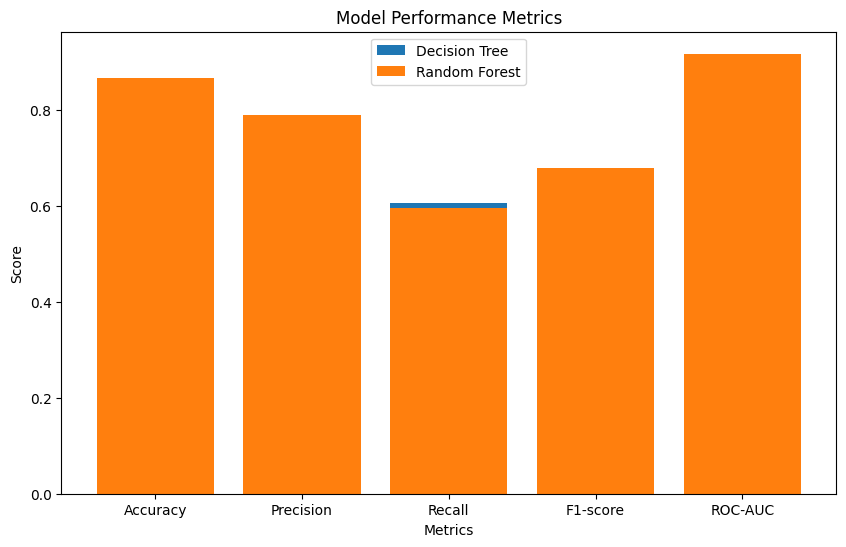

In [45]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
dt_scores = [accuracyDT, precisionDT, recallDT, f1_DT, roc_aucDT]
rf_scores = [accuracyRF, precisionRF, recallRF, f1_RF, roc_aucRF]
plt.figure(figsize=(10, 6))
plt.bar(metrics, dt_scores, label='Decision Tree')
plt.bar(metrics, rf_scores, label='Random Forest')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.legend()
plt.show()

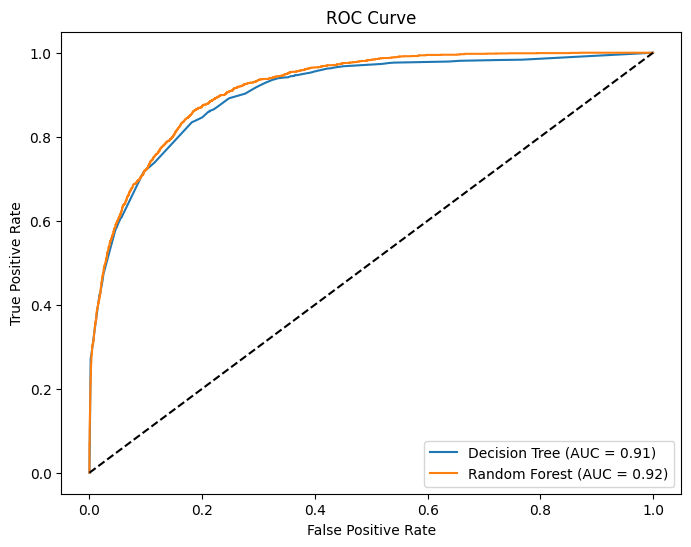

In [48]:
# Convert target variable to binary values
y_test_binary = np.where(y_test == '>50K', 1, 0)

y_pred_prob_DT = grid_searchDT.predict_proba(X_test)[:, 1]
y_pred_prob_RF = grid_searchRF.predict_proba(X_test)[:, 1]

roc_auc_DT = roc_auc_score(y_test_binary, y_pred_prob_DT)
roc_auc_RF = roc_auc_score(y_test_binary, y_pred_prob_RF)

fpr_DT, tpr_DT, _ = roc_curve(y_test_binary, y_pred_prob_DT)
fpr_RF, tpr_RF, _ = roc_curve(y_test_binary, y_pred_prob_RF)

plt.figure(figsize=(8, 6))

plt.plot(fpr_DT, tpr_DT, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_DT))
plt.plot(fpr_RF, tpr_RF, label='Random Forest (AUC = {:.2f})'.format(roc_auc_RF))
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()
